# 機械学習  
ここでは機械学習の基礎について学んでいきます．  
データ分析するのに欠かせない知識，スキルであるので  
その基本をここで身に着けちゃいましょう！

機械学習は人工知能の中の仕組みを担う部分！  
→予測や分別を行うメインの機能

## 1. 教師あり学習(分類)

第一回で取り扱う内容
- 分類とは
- 決定木の実装

分類：カテゴリの異なる複数のデータを見分けることができる境界線を求めることが目的

線形：二次元平面上のデータを直線で分類できるとき = 線形分離可能  
線形分類器として有名なもの  
- 単純パーセプトロン  
- 線形サポートベクトルマシン  
- ロジスティク回帰

非線形：線形分離可能ではないとき  
非線形分類器として有名なもの  
- k-近傍法  
- 決定木(分類木)  
- ランダムフォレスト  
- 非線形サポートベクトルマシン  
- ニューラルネットワーク

### 今回は決定木をscikit-learnで実装します

簡単な例としてsciiy-learnにある「アヤメデータセット」を使用します

以下、実装の部分となります

必要なライブラリのインポート

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.datasets import load_iris

データセット

In [74]:
dataset = load_iris() #データセットの読み込み

In [75]:
columns_name =  dataset.feature_names #カラム名(特徴量)の取得
columns_name

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [76]:
x = dataset.data
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

上記のように，各アヤメの花ごとに4つのデータ(入力データ)が与えてあるので  
ここから分類をしていきます．

In [77]:
t = dataset.target
t

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

0，1，2の三種類が目標値として与えられている

In [78]:
np.unique(t) #tの重複がない値が返ってくる

array([0, 1, 2])

以下のようにしてデータのサイズを確認

In [79]:
x.shape

(150, 4)

In [80]:
t.shape

(150,)

データセットの分割

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=0)

分類のアルゴリズムの実装

In [83]:
from sklearn.tree import DecisionTreeClassifier #sklearnの決定木，分類器をインポート

In [84]:
model = DecisionTreeClassifier(random_state=0) #モデルのインスタンス化

In [85]:
model.fit(x_train, t_train) #モデルの学習

DecisionTreeClassifier(random_state=0)

In [86]:
#モデルの評価
print(f"train score: {model.score(x_train, t_train)}") #訓練データのスコア
print(f"test score: {model.score(x_test, t_test)}") #テストデータのスコア

train score: 1.0
test score: 0.9777777777777777


上記の訓練データ，テストデータのスコア(正解率)がわかる．  
決定係数とは異なるので注意．

以下のようにして推論を行う．

In [87]:
model.predict(x_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

上記からわかるように，カテゴリがわかるような離散値が出力される．

## 決定木の特徴

決定木の強み  
- なぜそのような結果になったのか説明が容易である  
- 必要な前処理が少ない

決定木の弱み  
- 過学習になる場合が多く，汎用性が低いモデルになる傾向がある

過学習を防ぐために・・・  
- max_depthと言われるハイパーパラメータがあり，決定木の深さを調整ができる  
- min_samples_splitは分岐先のサンプル数の最低値を設定するパラメータで，過学習に陥る可能性もあるので調整が必要

In [88]:
import graphviz
from sklearn.tree import export_graphviz

In [89]:
dot_data =export_graphviz(model)

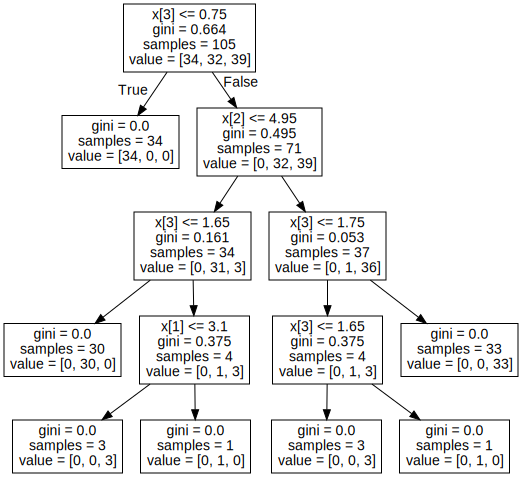

In [90]:
graph_tree = graphviz.Source(dot_data)
graph_tree

影響度の高いものを確認してみる

In [91]:
feature_importance = model.feature_importances_
feature_importance

array([0.        , 0.02150464, 0.39766951, 0.58082584])

In [92]:
columns_name

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

petal widthの影響が高いと考えられる

以下はその可視化の例

In [93]:
y = columns_name
width = feature_importance

<BarContainer object of 4 artists>

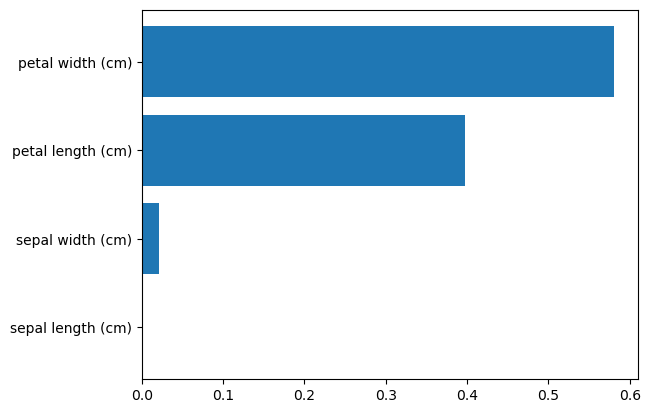

In [94]:
plt.barh(y=y, width=width)

以上のように，決定木は非常に解釈しやすく，  
今後のアルゴリズムの基礎概念にもつながってくるものです．  
ランダムフォレストやlightgbmといった決定木から派生した  
高性能なアルゴリズムもあります

## SVM

### SVM(サポートベクトルマシン)とは  
二つのカテゴリを線形分離するようにして識別するアルゴリズム．  
サンプルとのマージン(距離)が最大になるように分類します．

これよりSVM(サポートベクトルマシン)の実装を行います

In [95]:
from sklearn.svm import SVC #SVMのインポート

In [96]:
model = SVC() #モデルのインスタンス化

In [97]:
model.fit(x_train, t_train) #モデルの学習

SVC()

In [98]:
print(f"train score: {model.score(x_train, t_train)}")
print(f"test score: {model.score(x_test, t_test)}")

train score: 0.9714285714285714
test score: 0.9777777777777777


以下，標準化を実装していきます．

In [99]:
from sklearn.preprocessing import StandardScaler

In [100]:
scaler = StandardScaler() #インスタンス化

In [101]:
scaler.fit(x_train) #訓練データの平均と標準偏差を計算

StandardScaler()

In [102]:
x_train_std = scaler.transform(x_train) #訓練データの標準化
x_test_std = scaler.transform(x_test) #テストデータの標準化

In [103]:
round(x_train_std.mean()) #平均が0になっていることを確認

0

In [104]:
round(x_train_std.std()) #標準偏差が1になっていることを確認

1

標準化したものを再度，学習させましょう

In [105]:
model_std = SVC() #モデルのインスタンス化

In [106]:
model_std.fit(x_train_std, t_train) #モデルの学習 目標値は標準化しなくてよい

SVC()

In [107]:
print(f'train score: {model.score(x_train, t_train)}')
print(f'test score: {model.score(x_test, t_test)}')
print("==========================")
print(f'train score: {model_std.score(x_train_std, t_train)}')
print(f'test score: {model_std.score(x_test_std, t_test)}')

train score: 0.9714285714285714
test score: 0.9777777777777777
train score: 0.9714285714285714
test score: 0.9777777777777777


今回はスケール(単位)が統一されていたので特に変化はない．  
しかし，SVMには標準化が基本的には必要である．